In [82]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import mode
from scipy.stats import skew
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore') 

In [2]:
os.getcwd() 

'C:\\Users\\Shailesh2692'

In [3]:
os.chdir('F:\\PGDDS\\WNS Hackathon') 

In [4]:
train = pd.read_csv('train.csv')
train.head() 

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,15-11-18 0:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,15-11-18 0:01,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,15-11-18 0:02,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,15-11-18 0:02,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,15-11-18 0:02,62873,473,latest,0,0


In [5]:
train.shape

(237609, 7)

In [6]:
view_log = pd.read_csv('view_log.csv') 
view_log.head() 

,server_time,device_type,session_id,user_id,item_id
0,15-10-18 8:58,android,112333,4557,32970
1,15-10-18 8:58,android,503590,74788,7640
2,15-10-18 8:58,android,573960,23628,128855
3,15-10-18 8:58,android,121691,2430,12774
4,15-10-18 8:58,android,218564,19227,28296


In [7]:
view_log.shape

(1048575, 5)

In [8]:
item_data = pd.read_csv('item_data.csv') 
item_data.head() 

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [9]:
item_data.shape

(132761, 6)

In [10]:
test = pd.read_csv('test.csv') 
test.head() 

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [11]:
test.shape

(90675, 6)

In [12]:
train_actual = train.copy() 

In [13]:
view_log_actual = view_log.copy() 

In [14]:
item_data_actual = item_data.copy() 

In [15]:
test_data_actual = test.copy() 

### Merging train and view_log Dataframes

In [16]:
train1 = pd.merge(train,view_log[['device_type','session_id','user_id','item_id']],on = 'user_id') 
train1.head() 

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,device_type,session_id,item_id
0,c4ca4238a0b923820dcc509a6f75849b,15-11-18 0:00,87862,422,old,0,0,android,190710,43886
1,621bf66ddb7c962aa0d22ac97d69b793,15-11-18 0:19,87862,422,old,0,0,android,190710,43886
2,ab394288aed46588bdc90bf4b541ec0d,16-11-18 17:29,87862,422,old,0,0,android,190710,43886
3,45c48cce2e2d7fbdea1afc51c7c6ad26,15-11-18 0:01,63410,467,latest,1,1,android,356854,43209
4,45c48cce2e2d7fbdea1afc51c7c6ad26,15-11-18 0:01,63410,467,latest,1,1,android,356854,66370


In [17]:
train1.shape

(3690451, 10)

In [18]:
train1['session_id'].isin(view_log['session_id']).value_counts() 

True    3690451
Name: session_id, dtype: int64

In [19]:
train1['user_id'].isin(view_log['user_id']).value_counts() 

True    3690451
Name: user_id, dtype: int64

In [20]:
train1.duplicated().sum() 

798963

In [21]:
train1_new = train1.drop_duplicates(subset=['impression_id'],keep='first') 
train1_new.head() 

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,device_type,session_id,item_id
0,c4ca4238a0b923820dcc509a6f75849b,15-11-18 0:00,87862,422,old,0,0,android,190710,43886
1,621bf66ddb7c962aa0d22ac97d69b793,15-11-18 0:19,87862,422,old,0,0,android,190710,43886
2,ab394288aed46588bdc90bf4b541ec0d,16-11-18 17:29,87862,422,old,0,0,android,190710,43886
3,45c48cce2e2d7fbdea1afc51c7c6ad26,15-11-18 0:01,63410,467,latest,1,1,android,356854,43209
10,6b18886bc278247582704943f5c66eb9,16-11-18 16:31,63410,467,latest,1,0,android,356854,43209


In [22]:
train1_new.shape

(171494, 10)

### Merging train, view_log and item_data Dataframes

In [23]:
train2 = pd.merge(train1_new,item_data[['item_id','item_price']],on='item_id')
train2.head() 

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,device_type,session_id,item_id,item_price
0,c4ca4238a0b923820dcc509a6f75849b,15-11-18 0:00,87862,422,old,0,0,android,190710,43886,2350
1,621bf66ddb7c962aa0d22ac97d69b793,15-11-18 0:19,87862,422,old,0,0,android,190710,43886,2350
2,ab394288aed46588bdc90bf4b541ec0d,16-11-18 17:29,87862,422,old,0,0,android,190710,43886,2350
3,45c48cce2e2d7fbdea1afc51c7c6ad26,15-11-18 0:01,63410,467,latest,1,1,android,356854,43209,3421
4,6b18886bc278247582704943f5c66eb9,16-11-18 16:31,63410,467,latest,1,0,android,356854,43209,3421


In [24]:
train2.shape

(171332, 11)

In [25]:
train2.drop(['impression_time','user_id','app_code','session_id','item_id'],axis=1,inplace=True) 
train2.head() 

,impression_id,os_version,is_4G,is_click,device_type,item_price
0,c4ca4238a0b923820dcc509a6f75849b,old,0,0,android,2350
1,621bf66ddb7c962aa0d22ac97d69b793,old,0,0,android,2350
2,ab394288aed46588bdc90bf4b541ec0d,old,0,0,android,2350
3,45c48cce2e2d7fbdea1afc51c7c6ad26,latest,1,1,android,3421
4,6b18886bc278247582704943f5c66eb9,latest,1,0,android,3421


In [26]:
train2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171332 entries, 0 to 171331
Data columns (total 6 columns):
impression_id    171332 non-null object
os_version       171332 non-null object
is_4G            171332 non-null int64
is_click         171332 non-null int64
device_type      171332 non-null object
item_price       171332 non-null int64
dtypes: int64(3), object(3)
memory usage: 9.2+ MB


In [27]:
train2.shape

(171332, 6)

In [28]:
train2_impression_id = train2.impression_id

In [29]:
train2 = train2.drop('impression_id',1)  

In [30]:
train2.head() 

,os_version,is_4G,is_click,device_type,item_price
0,old,0,0,android,2350
1,old,0,0,android,2350
2,old,0,0,android,2350
3,latest,1,1,android,3421
4,latest,1,0,android,3421


### Merging test and view_log Dataframes

In [31]:
test1 = pd.merge(test,view_log[['device_type','session_id','user_id','item_id']],on = 'user_id') 
test1.head() 

,impression_id,impression_time,user_id,app_code,os_version,is_4G,device_type,session_id,item_id
0,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,android,368797,55912
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,android,368797,80771
2,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,android,368797,80771
3,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,android,368797,8365
4,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,android,368797,8365


In [32]:
test1.shape

(1314262, 9)

In [33]:
test1['session_id'].isin(view_log['session_id']).value_counts() 

True    1314262
Name: session_id, dtype: int64

In [34]:
test1['user_id'].isin(view_log['user_id']).value_counts() 

True    1314262
Name: user_id, dtype: int64

In [35]:
test1.duplicated().sum() 

280671

In [36]:
test1_new = test1.drop_duplicates(subset=['impression_id'],keep='first') 
test1_new.head() 

,impression_id,impression_time,user_id,app_code,os_version,is_4G,device_type,session_id,item_id
0,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,android,368797,55912
23,a9330f293f6cb4f721fb0f3228cc805a,2018-12-14 15:20:00,29656,44,latest,0,android,368797,55912
46,3a5316432ed157f4e202c477f8abd9f2,2018-12-18 05:50:00,29656,44,latest,0,android,368797,55912
69,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1,android,568979,94943
73,af415349ea80b0b570a12273a1db7549,2018-12-14 12:07:00,25234,296,latest,1,android,568979,94943


In [37]:
test1_new.shape

(64205, 9)

### Merging test, view_log and item_data Dataframes

In [38]:
test2 = pd.merge(test1_new,item_data[['item_id','item_price']],on='item_id')
test2.head() 

,impression_id,impression_time,user_id,app_code,os_version,is_4G,device_type,session_id,item_id,item_price
0,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,android,368797,55912,1529
1,a9330f293f6cb4f721fb0f3228cc805a,2018-12-14 15:20:00,29656,44,latest,0,android,368797,55912,1529
2,3a5316432ed157f4e202c477f8abd9f2,2018-12-18 05:50:00,29656,44,latest,0,android,368797,55912,1529
3,1313f9d0868c6fc623a90db656836603,2018-12-12 15:42:00,69113,516,latest,0,android,564755,55912,1529
4,ba8b3142895d94e99694e9cf55bfc8a5,2018-12-13 13:40:00,69113,516,latest,0,android,564755,55912,1529


In [39]:
test2.shape 

(64134, 10)

In [40]:
test2.drop(['impression_time','user_id','app_code','session_id','item_id'],axis=1,inplace=True) 
test2.head() 

,impression_id,os_version,is_4G,device_type,item_price
0,caac14a5bf2ba283db7708bb34855760,latest,0,android,1529
1,a9330f293f6cb4f721fb0f3228cc805a,latest,0,android,1529
2,3a5316432ed157f4e202c477f8abd9f2,latest,0,android,1529
3,1313f9d0868c6fc623a90db656836603,latest,0,android,1529
4,ba8b3142895d94e99694e9cf55bfc8a5,latest,0,android,1529


In [41]:
test2.shape

(64134, 5)

In [42]:
test2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64134 entries, 0 to 64133
Data columns (total 5 columns):
impression_id    64134 non-null object
os_version       64134 non-null object
is_4G            64134 non-null int64
device_type      64134 non-null object
item_price       64134 non-null int64
dtypes: int64(2), object(3)
memory usage: 2.9+ MB


In [43]:
test2_impression_id = test2.impression_id

In [44]:
test2 = test2.drop('impression_id',1)  

In [45]:
test2.head() 

,os_version,is_4G,device_type,item_price
0,latest,0,android,1529
1,latest,0,android,1529
2,latest,0,android,1529
3,latest,0,android,1529
4,latest,0,android,1529


## Univariate Analysis

#### Target Variable - is_click

In [46]:
train2.describe() 

,is_4G,is_click,item_price
count,171332.000000,171332.000000,171332.000000
mean,0.342989,0.046366,11065.767025
std,0.474709,0.210277,23142.796700
min,0.000000,0.000000,23.000000
25%,0.000000,0.000000,1280.000000
50%,0.000000,0.000000,2995.000000
75%,1.000000,0.000000,9600.000000
max,1.000000,1.000000,378048.000000


In [47]:
train2['is_click'].value_counts() 

0    163388
1      7944
Name: is_click, dtype: int64

In [48]:
train2['is_click'].value_counts(normalize=True)  

0    0.953634
1    0.046366
Name: is_click, dtype: float64

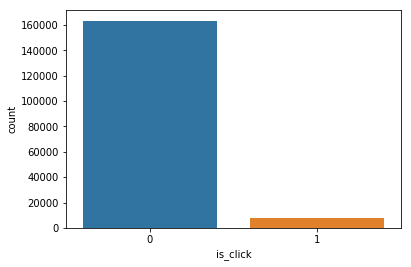

In [49]:
sns.countplot(x='is_click',data=train2) 

#### Independant Categorical Data - is_4G
#### Independant Ordinal Data - os_version, device_type
#### Independant Numerical data - item_price

## Analysis Of Independant Categorical Data - is_4G

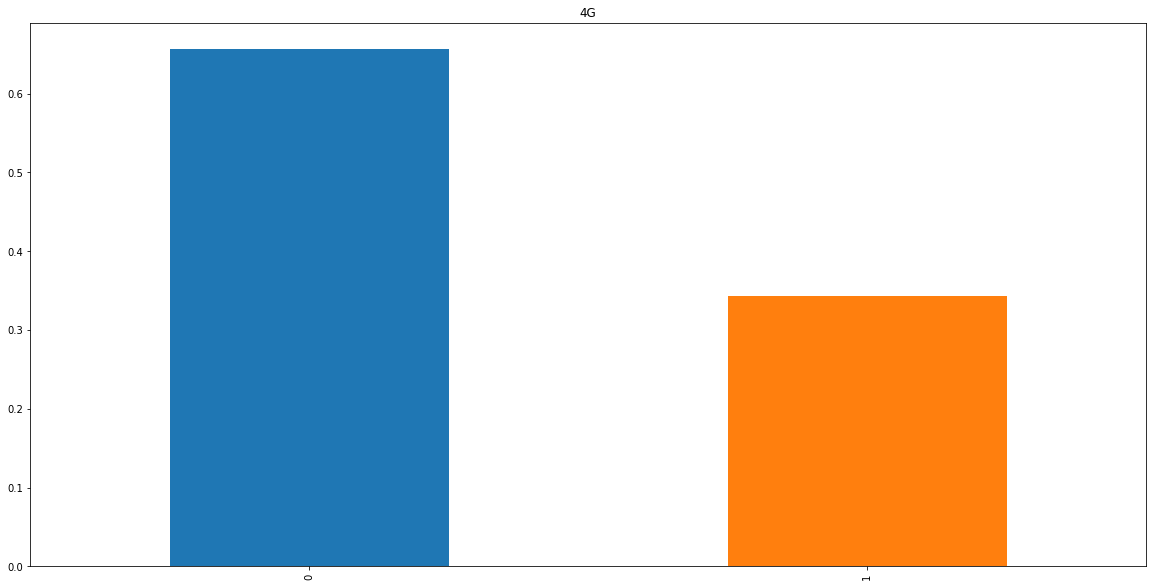

In [50]:
plt.subplot(1,1,1)
train2['is_4G'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='4G') 
plt.show() 

## Analysis Of Independant Ordinal Data - os_version, device_type

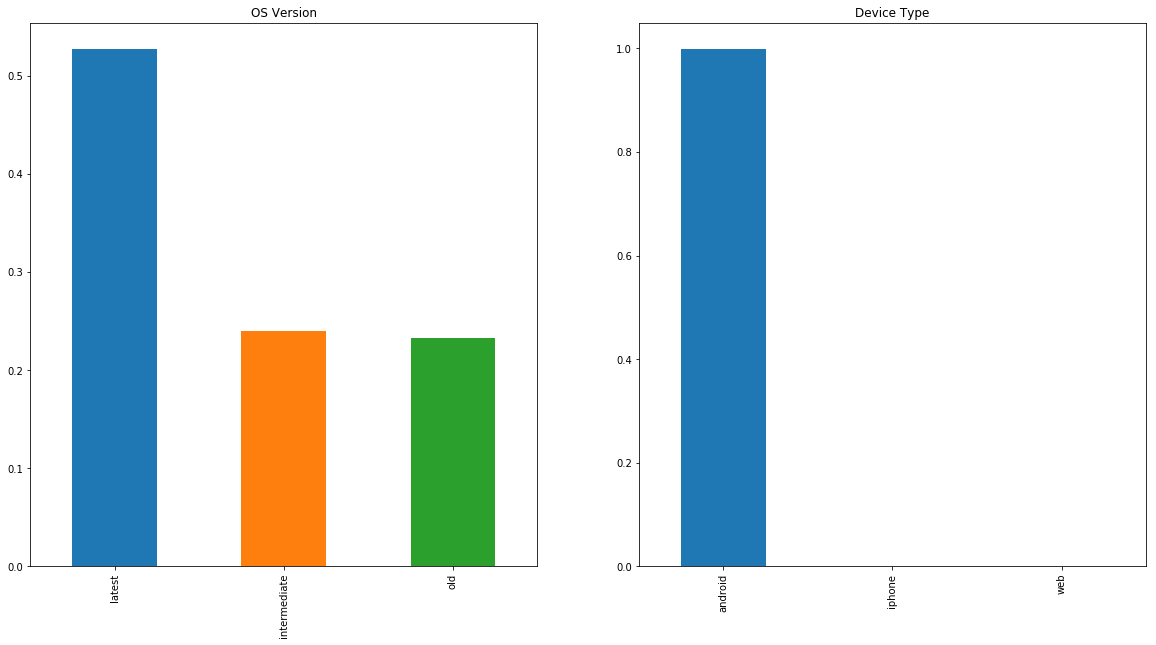

In [51]:
plt.subplot(1,2,1)
train2['os_version'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='OS Version') 
plt.subplot(1,2,2) 
train2['device_type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Device Type') 
plt.show() 

## Analysis Of Independant Numerical Categorical data - item_price

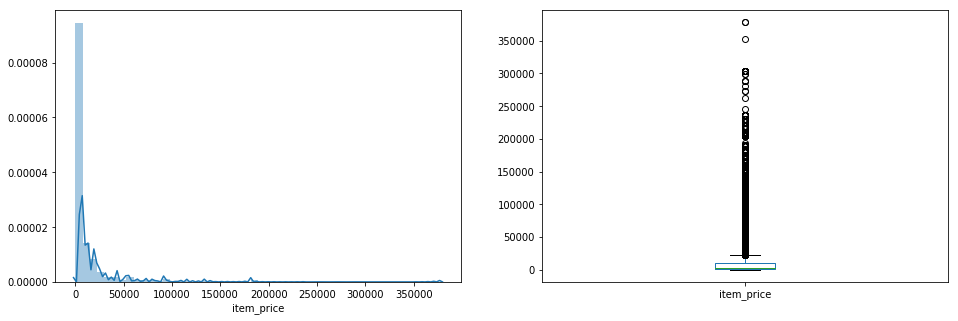

In [52]:
train2_nonull = train2.dropna() 
plt.subplot(1,2,1) 
sns.distplot(train2['item_price'])
plt.subplot(1,2,2)
train2['item_price'].plot.box(figsize=(16,5)) 

## Bivariate Analysis

### Analysis Of Independant Categorical Data - is_4G Vs Target Variable - is_click

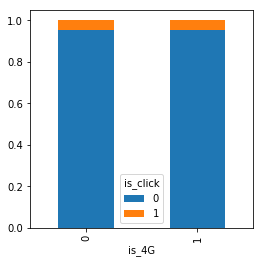

In [53]:
is_4G = pd.crosstab(train2['is_4G'],train['is_click'])
is_4G.div(is_4G.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True) 
plt.show() 

### Analysis Of Independant Ordinal Data Vs Analysis Of Target Variable i.e os_version Vs is_click and device_type Vs is_click

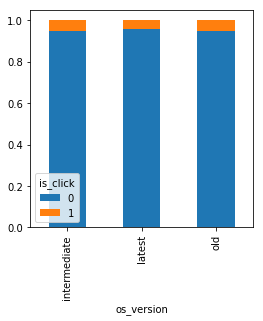

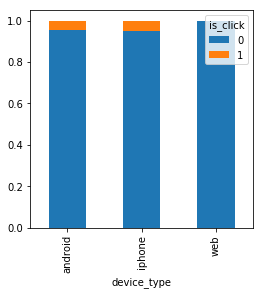

In [54]:
os_version = pd.crosstab(train2['os_version'],train2['is_click'])
os_version.div(os_version.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4)) 
plt.show() 
device_type = pd.crosstab(train2['device_type'],train2.is_click) 
device_type.div(device_type.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4)) 
plt.show() 

### Analysis Of Independant Numerical data Vs Target Variable - item_price Vs is_click

In [55]:
# Analyse Mean of item_price -train.groupby(Target Variable)[Independent Numerical Variable].mean.plot.bar() 

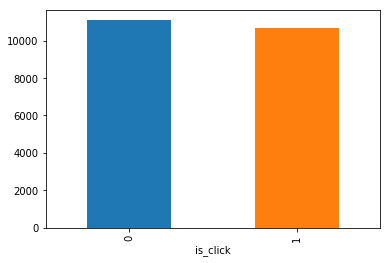

In [56]:
train2.groupby('is_click')['item_price'].mean().plot.bar() 

In [57]:
# Analysis of item_price with bins and groups

In [58]:
bins = [0,1300,3000,10000,380000] 

In [59]:
groups = ['Low','Average','High','Very High'] 

In [60]:
train2['item_price_bin'] = pd.cut(train2_nonull['item_price'],bins,labels=groups) 

In [61]:
item_price_bin = pd.crosstab(train2['item_price_bin'],train2['is_click']) 

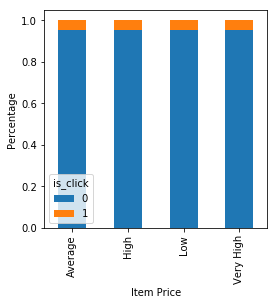

In [62]:
item_price_bin.div(item_price_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4)) 
plt.xlabel('Item Price')
plt.ylabel('Percentage') 
plt.show() 

In [63]:
## 1. Dropping Bins variables we had created

In [64]:
train2 = train2.drop(['item_price_bin'],axis=1) 

In [65]:
train2.isnull().sum() 

os_version     0
is_4G          0
is_click       0
device_type    0
item_price     0
dtype: int64

In [66]:
# Use Log Transformation to remove right skewness

In [67]:
train2['item_price_log'] = np.log(train2['item_price']) 

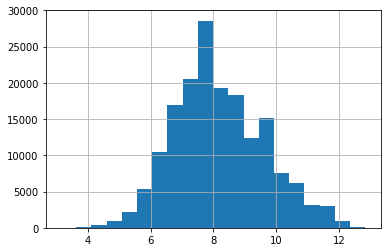

In [68]:
train2['item_price_log'].hist(bins=20) 

In [69]:
test2['item_price_log'] = np.log(test2['item_price']) 

In [70]:
x = train2.drop('is_click',1)
y = train2.is_click  

In [71]:
x = pd.get_dummies(x) 

In [72]:
train2 = pd.get_dummies(train2) 

In [73]:
test2 = pd.get_dummies(test2)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state = 100) 

In [75]:
lr = LogisticRegression() 

In [76]:
lr.fit(x_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
y_pred = lr.predict(x_test) 

In [78]:
from sklearn.metrics import roc_auc_score
print('Accuracy: ',accuracy_score(y_test,y_pred)) 
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred)) 

Accuracy:  0.952665830098929
ROC AUC Score:  0.49998468418795566
